In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
Usa = pd.read_csv('/content/Usa.csv', encoding='latin1')
Sub = pd.read_csv('/content/Sub.csv', encoding='latin1')
Fer = pd.read_csv('/content/Fer.csv', encoding='latin1')
Ken = pd.read_csv('/content/Ken.csv', encoding='latin1')
Usa.head()

In [ ]:
UsaPM2_5 = Usa.filter(['PM2.5'])

In [ ]:
Usa2 = UsaPM2_5.dropna()
dtaUs = Usa2.values

In [ ]:
len_data =  int(np.ceil(len(dtaUs * 0.6)))
wiz = 60
len_data

246

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaledUs = scaler.fit_transform(dtaUs)

In [ ]:
train =  scaledUs[0:int(len_data)]
x_train = []
y_train = []

In [ ]:
for i in range(wiz, len(train)):
  x_train.append(train[i-wiz:i,0])
  y_train.append(train[i,0])
  if i <= wiz + 1:
    print('x_train', x_train)
    print('y_train', y_train)
    print()

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(x_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)

    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)

    x = tf.keras.layers.Dense(25 , activation="relu", name ="dense_1")(x)

    output = tf.keras.layers.Dense(1, name="last_dense")(x)

    model = tf.keras.Model(inputs=input, outputs=output)

    return model

LSTM_model = build_LSTM_model()
LSTM_model.summary()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_22 (Bidirect  (None, 60, 256)           133120    
 ional)                                                          
                                                                 
 bidirectional_23 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
 last_dense (Dense)          (None, 1)                 26        
                                                                 
Total params: 300723 (1.15 MB)
Trainable params: 300723 (1.

In [ ]:
epochs = 50
batch_size = 500
early_stopping_patience = 17
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
history = LSTM_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

ValueError: Expected input data to be non-empty.

dict_keys(['loss'])


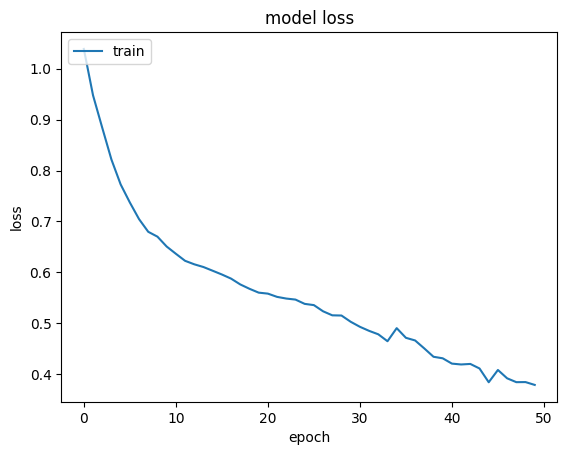

In [ ]:
print(history.history.keys())

# summarize history for loss

fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaledUs[len_data - wiz: ]
# Create the data sets x_test and y_test
x_test = []
y_test = dtaUs[len_data:, :]
for i in range(wiz, len(test_data)):
    x_test.append(test_data[i-wiz:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))



In [ ]:
# Get the models predicted price values
predictions = LSTM_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

ValueError: Expected input data to be non-empty.